In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_curve

def show_grid_results(grid_search, all=True):
    print('Best parameters:\n', grid_search.best_params_, '\n', grid_search.best_score_, '\n')
    if all:
        cvres = grid_search.cv_results_
        for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
            print(mean_score, params)

In [2]:
train = pd.read_csv('./data/cl_train.csv')
test = pd.read_csv('./data/cl_test.csv')
train.shape, test.shape

((520, 255), (281, 254))

In [3]:
Y = train['is_legendary']
X = train.drop(columns=['is_legendary', 'unique_id'])
Xt = test.drop(columns=['unique_id'])

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
Xt_scaled = scaler.transform(Xt)

### Collect the models score

In [66]:
l = ['a', 'b', 'c']
ix = l.index('c')
ix

2

In [67]:
def save_clf(obj: dict):
    name = type(obj['clf']).__name__
    global clfs_name, clfs, X_used, scores
    if name in clfs_name:
        ix = clfs_name.index(name)
        
        clfs_name.pop(ix)
        clfs.pop(ix)
        X_used.pop(ix)
        scores.pop(ix)
        
    clfs_name.append(name)
    clfs.append(obj['clf'])
    X_used.append(obj['X'])
    scores.append(obj['score'])

def reset_clfs():
    global clfs_name, clfs, X_used, scores
    clfs_name = []
    clfs = []
    X_used = []
    scores = []

reset_clfs()

# Logistic Classifier

In [68]:
from sklearn.linear_model import LogisticRegression
param_grid = [
#     { 'solver':['liblinear'] },
    { 'solver':['newton-cg'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
#     { 'solver':['lbfgs'], 'penalty':['l2', 'none'], 'multi_class':['ovr', 'multinomial', 'auto'] },
#     { 'solver':['saga'], 'l1_ratio':[0.5, 0.6, 0.75, 0.9], 'max_iter':[1000], 'penalty':['l1', 'l2', 'elasticnet'] },
#     { 'solver':['sag'], 'penalty':['l2'], 'max_iter': [1000] }
]
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X_scaled, Y)
show_grid_results(grid_search)

Best parameters:
 {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 
 0.6634615384615384 

0.6634615384615384 {'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.32859806859806856 {'multi_class': 'ovr', 'penalty': 'none', 'solver': 'newton-cg'}
0.6119505494505495 {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.3321045621045621 {'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'newton-cg'}
0.6634615384615384 {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
0.32859806859806856 {'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
aux = {
    'X': X_scaled,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    { 'n_estimators': [100, 150, 200] }
]
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'n_estimators': 200} 
 0.9666666666666666 

0.9416666666666665 {'n_estimators': 100}
0.95 {'n_estimators': 150}
0.9666666666666666 {'n_estimators': 200}


In [71]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# Neural Network

In [79]:
from sklearn.neural_network import MLPClassifier
param_grid = [
#     { 'hidden_layer_sizes': [(10,10,10)], 'max_iter': [1000] } # .91153
    { 'hidden_layer_sizes': [(10,20,10)], 'max_iter': [1000] } # .905769
#     { 'hidden_layer_sizes': [(10,10,10,10)], 'max_iter': [1000] } # .892307
]
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:
 {'hidden_layer_sizes': (10, 20, 10), 'max_iter': 1000} 
 0.48948717948717946 

0.48948717948717946 {'hidden_layer_sizes': (10, 20, 10), 'max_iter': 1000}


In [82]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = [
    { 'n_neighbors': [2, 5], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
]
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

Best parameters:
 {'algorithm': 'auto', 'n_neighbors': 5} 
 0.5681089743589743 

0.46762820512820513 {'algorithm': 'auto', 'n_neighbors': 2}
0.5681089743589743 {'algorithm': 'auto', 'n_neighbors': 5}
0.46762820512820513 {'algorithm': 'ball_tree', 'n_neighbors': 2}
0.5681089743589743 {'algorithm': 'ball_tree', 'n_neighbors': 5}
0.46762820512820513 {'algorithm': 'kd_tree', 'n_neighbors': 2}
0.5681089743589743 {'algorithm': 'kd_tree', 'n_neighbors': 5}
0.46762820512820513 {'algorithm': 'brute', 'n_neighbors': 2}
0.5681089743589743 {'algorithm': 'brute', 'n_neighbors': 5}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [85]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# SVC

In [116]:
from sklearn.svm import SVC
param_grid = [
    { 'kernel': ['linear'], 'probability': [True] }, # .9269
#     { 'kernel': ['rbf'], 'gamma': [0.5, 1], 'C': [0.01, 0.05] } # .90769
    { 'kernel': ['poly'], 'gamma': [1], 'probability': [True] }, # lot of time
    { 'kernel': ['sigmoid'], 'gamma': [1], 'C': [0.025], 'probability': [True] } # .90769
]
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='precision', return_train_score=True)
grid_search.fit(X_scaled, Y)
show_grid_results(grid_search)

Best parameters:
 {'gamma': 1, 'kernel': 'poly', 'probability': True} 
 0.636029411764706 

0.4954545454545454 {'kernel': 'linear', 'probability': True}
0.636029411764706 {'gamma': 1, 'kernel': 'poly', 'probability': True}
0.0 {'C': 0.025, 'gamma': 1, 'kernel': 'sigmoid', 'probability': True}


In [117]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# AdaBoostClassifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = [
    { 'n_estimators': [10, 20, 50], 'algorithm': ['SAMME', 'SAMME.R'] }
]
model = AdaBoostClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters:
 {'algorithm': 'SAMME', 'n_estimators': 50} 
 0.6825961538461537 

0.4442307692307692 {'algorithm': 'SAMME', 'n_estimators': 10}
0.6155769230769231 {'algorithm': 'SAMME', 'n_estimators': 20}
0.6825961538461537 {'algorithm': 'SAMME', 'n_estimators': 50}
0.5838782051282051 {'algorithm': 'SAMME.R', 'n_estimators': 10}
0.6111034798534797 {'algorithm': 'SAMME.R', 'n_estimators': 20}
0.6590384615384615 {'algorithm': 'SAMME.R', 'n_estimators': 50}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [96]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# GaussianNB

In [97]:
from sklearn.naive_bayes import GaussianNB
param_grid = [
    { 'var_smoothing': [0.01, 0.1, 0.15] }
]
model = GaussianNB()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'var_smoothing': 0.1} 
 0.5836538461538462 

0.5364468864468863 {'var_smoothing': 0.01}
0.5836538461538462 {'var_smoothing': 0.1}
0.5836538461538462 {'var_smoothing': 0.15}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [98]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# Linear Classifier

In [99]:
from sklearn.linear_model import SGDClassifier
param_grid = [
    { 'penalty': ['l1', 'l2', 'elasticnet'], 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] }
]
model = SGDClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision', return_train_score=True)
grid_search.fit(X, Y)
show_grid_results(grid_search)

Best parameters:
 {'loss': 'hinge', 'penalty': 'l1'} 
 0.36044438018122227 

0.36044438018122227 {'loss': 'hinge', 'penalty': 'l1'}
0.3005861017717582 {'loss': 'hinge', 'penalty': 'l2'}
0.18121794871794872 {'loss': 'hinge', 'penalty': 'elasticnet'}
0.2571287046287046 {'loss': 'log', 'penalty': 'l1'}
0.13015184742158423 {'loss': 'log', 'penalty': 'l2'}
0.12786874946758667 {'loss': 'log', 'penalty': 'elasticnet'}
0.1503205128205128 {'loss': 'modified_huber', 'penalty': 'l1'}
0.13465798694059564 {'loss': 'modified_huber', 'penalty': 'l2'}
0.35627039627039625 {'loss': 'modified_huber', 'penalty': 'elasticnet'}
0.14796245421245421 {'loss': 'squared_hinge', 'penalty': 'l1'}
0.1951832907075874 {'loss': 'squared_hinge', 'penalty': 'l2'}
0.12302655677655677 {'loss': 'squared_hinge', 'penalty': 'elasticnet'}
0.14447115384615383 {'loss': 'perceptron', 'penalty': 'l1'}
0.17568604750878997 {'loss': 'perceptron', 'penalty': 'l2'}
0.05611111111111111 {'loss': 'perceptron', 'penalty': 'elasticnet'}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
aux = {
    'X': X,
    'clf': grid_search.best_estimator_,
    'score': grid_search.best_score_
}
save_clf(aux)

# ROC Curve

In [109]:
clfs_name

['LogisticRegression',
 'RandomForestClassifier',
 'MLPClassifier',
 'KNeighborsClassifier',
 'SVC',
 'AdaBoostClassifier',
 'GaussianNB',
 'SGDClassifier']

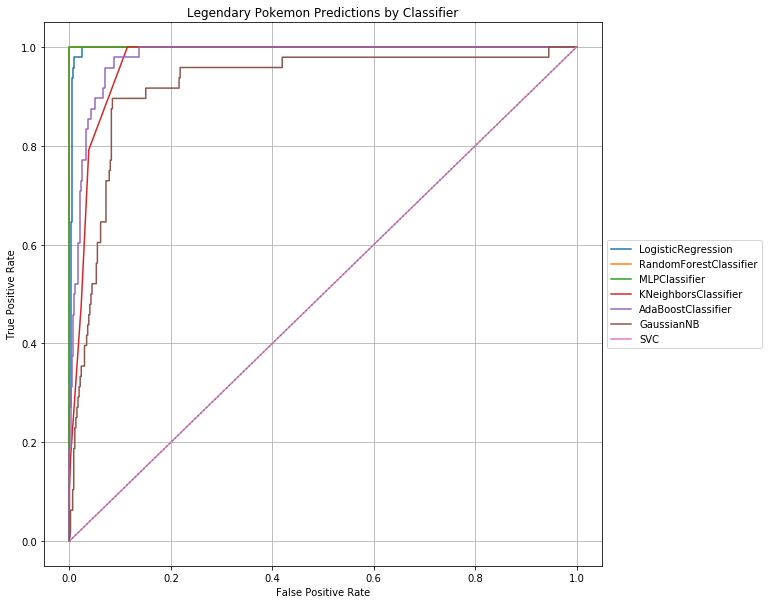

In [122]:
skip = ['SGDClassifier']
# skip = []
roc_score = []
for ix in range(len(clfs_name)):
    this_x = X_used[ix]
    this_model = clfs[ix]
    model_name = clfs_name[ix]
    model_prediction = this_model.predict(this_x)
#     acc = accuracy_score(Y, model_prediction)
    prec = precision_score(Y, model_prediction)
    roc_score.append(prec)
    if model_name in skip: continue
#     temp_acc = temp_acc.append({'Feature':feature_name, 'Accuracy':acc}, ignore_index=True)
    SY = this_model.predict_proba(this_x)[:,1] # second column = probability
#     print(model_name)
    SFPR, STPR, STHRESH = roc_curve(Y, SY)
    plt.plot(SFPR, STPR, label=model_name)
    
plt.plot([0,1],[0,1], label='', ls='dotted')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Legendary Pokemon Predictions by Classifier")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.gcf().set_size_inches(10,10);
# print('Feature\t      Accuracy')
# temp_acc.sort_values(by='Accuracy', ascending=False)

In [127]:
accdf = pd.DataFrame(columns=['Classifier', 'Precision'])
accdf['Classifier'] = clfs_name
accdf['Precision'] = scores
# accdf['Precision on Whole Data'] = roc_score
accdf.sort_values('Precision', ascending=False)

,Classifier,Precision
1,RandomForestClassifier,0.966667
4,AdaBoostClassifier,0.682596
0,LogisticRegression,0.663462
7,SVC,0.636029
5,GaussianNB,0.583654
3,KNeighborsClassifier,0.568109
2,MLPClassifier,0.489487
6,SGDClassifier,0.360444


# Predict the test set

In [131]:
best_model = clfs[1]
Yt = best_model.predict(Xt)

In [136]:
output = pd.DataFrame()
output['unique_id'] = test['unique_id']
output['is_legendary'] = Yt
output.head()

,unique_id,is_legendary
0,602,0.0
1,756,0.0
2,191,0.0
3,16,0.0
4,718,0.0


In [137]:
import datetime
tnow = datetime.datetime.now()
_result_file = 'results/result_'+tnow.strftime("%b-%d %H %M %S")+'.csv'
output.to_csv(_result_file, index=False)